In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset

In [2]:
ds=pd.read_csv('spam.csv',sep=',',header=None, encoding="latin-1")
print(ds.columns)
ds.columns=['Label','SMS','a','b','c']
print(ds.columns)
ds.drop(['a','b','c'], axis=1, inplace=True)
ds.drop(0, inplace=True)
ds.reset_index(drop=True, inplace=True)
print(ds.shape)
ds.head()
#print(ds.SMS.head())


Int64Index([0, 1, 2, 3, 4], dtype='int64')
Index(['Label', 'SMS', 'a', 'b', 'c'], dtype='object')
(5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     0.865937
spam    0.134063
Name: Label, dtype: float64

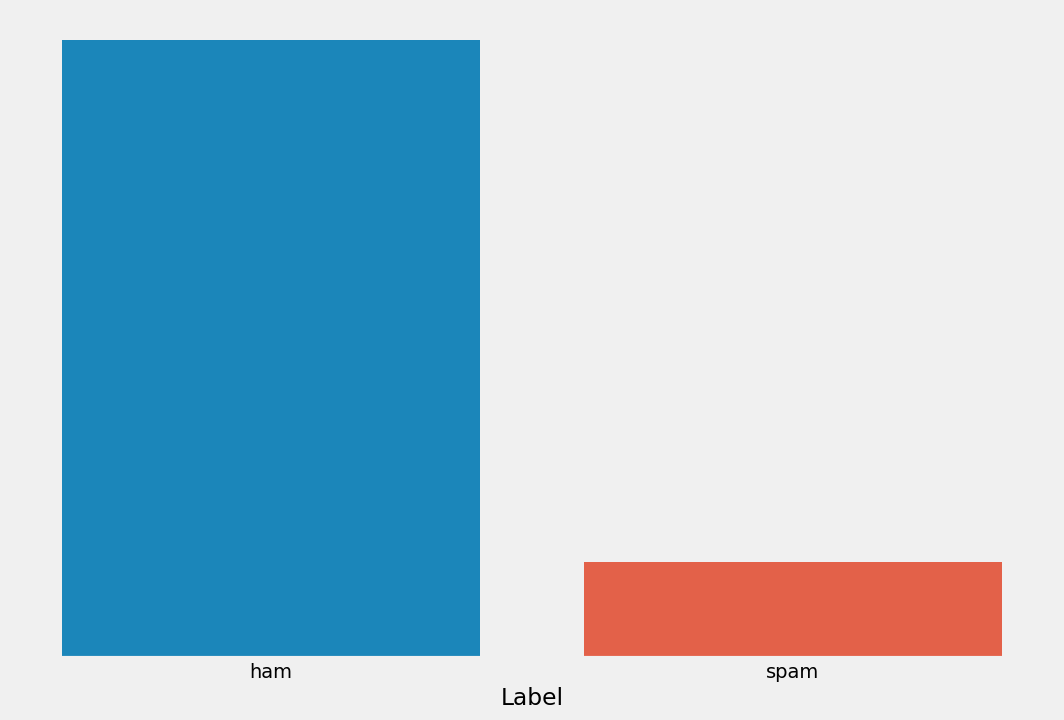

In [3]:
# countplot gives the proposition of spam to ham
# to know whether the data is balanced or not

import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.countplot(data=ds, x='Label')
plt.ylabel('')
plt.yticks([])
ds.Label.value_counts(normalize = True)


In [5]:
# the dataset is highly imbalanced  => lets leave it imbalanced
# dataset splitting => 80:20

# **Preparing Data**
Convert the text into lower-case and split it into seperate words

In [6]:
ds.SMS=ds['SMS'].str.replace('\W',' ')
ds.SMS=ds['SMS'].str.lower()
#messages=ds['SMS'].str.split()
print(ds.SMS.head())


0    go until jurong point  crazy   available only ...
1                        ok lar    joking wif u oni   
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor    u c already then say   
4    nah i don t think he goes to usf  he lives aro...
Name: SMS, dtype: object


<ipython-input-6-b1d1aa3d779f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ds.SMS=ds['SMS'].str.replace('\W',' ')


# Train test split

In [7]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(ds,test_size=0.2,random_state=0)
print(test.shape)
print(train.shape)

(1115, 2)
(4457, 2)


In [8]:
train.Label.value_counts(normalize = True)

ham     0.869643
spam    0.130357
Name: Label, dtype: float64

In [9]:
test.Label.value_counts(normalize = True)

ham     0.851121
spam    0.148879
Name: Label, dtype: float64

In [10]:
train.SMS.head(10)

1114    no no  this is kallis home ground amla home to...
3589    i am in escape theatre now    going to watch k...
3095    we walked from my moms  right on stagwood pass...
1012       i dunno they close oredi not    ìï v ma fan   
3320                               yo im right by yo work
4130     its ur luck to love someone  its ur fortune t...
1197     he also knows about lunch menu only da    i know
5426        oh yeah  and my diet just flew out the window
624     nah it s straight  if you can just bring bud o...
2260    splashmobile  choose from 1000s of gr8 tones e...
Name: SMS, dtype: object

# creating vocab

In [11]:
from itertools import chain
messages = train.SMS.str.split()
words = list(chain(*messages))
vocabulary = pd.Series(words).unique()

no_of_messages=len(train.SMS)
word_counts = {word: [0] * no_of_messages for word in vocabulary}

for index,mssge in enumerate(messages):
    for word in mssge:
        word_counts[word][index] += 1

len(vocabulary)

7653

In [12]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
token = RegexpTokenizer(r'[a-z0-9A-Z]+')
vectorizer = CountVectorizer(
    lowercase = True,
    stop_words = 'english',
    ngram_range = (1,1),
    tokenizer = token.tokenize
)
counts = vectorizer.fit_transform(train['SMS'])
print(len(vectorizer.get_feature_names_out()))
vocabulary = vectorizer.get_feature_names_out()

word_counts = dict(zip(vectorizer.get_feature_names_out(), np.transpose(counts.toarray())))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


7350


(-0.5, 1199.5, 799.5, -0.5)

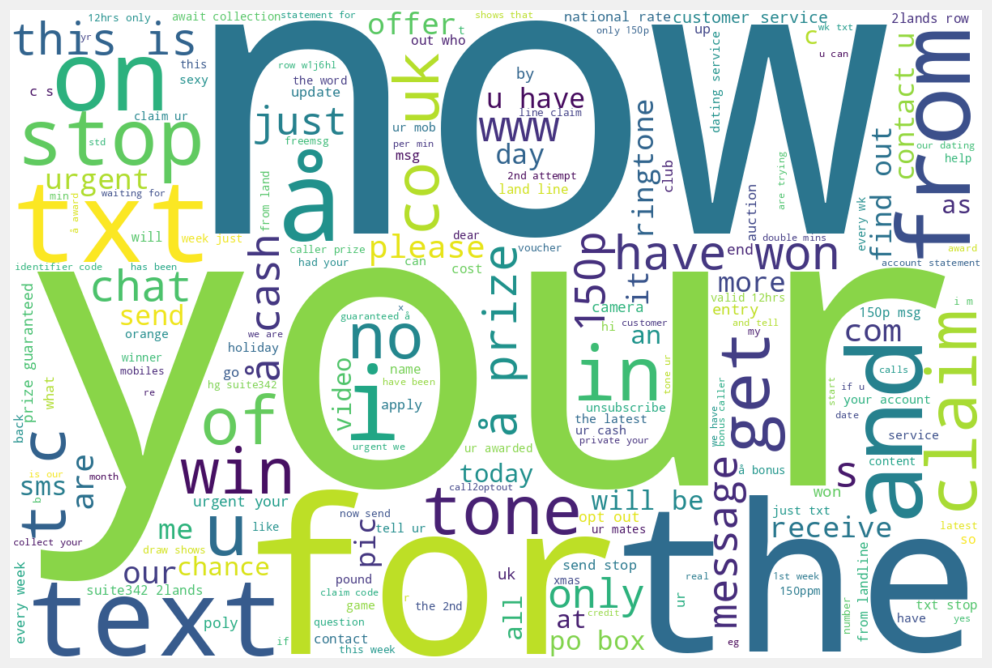

In [13]:
from wordcloud import WordCloud
text = ""

for message in train[train.Label == 'spam'].SMS:
    words = message.split()
    text = text + " ".join(words) + " "


wordcloud = WordCloud(width=1200,height=800,stopwords=words,background_color='white').generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

(-0.5, 1199.5, 799.5, -0.5)

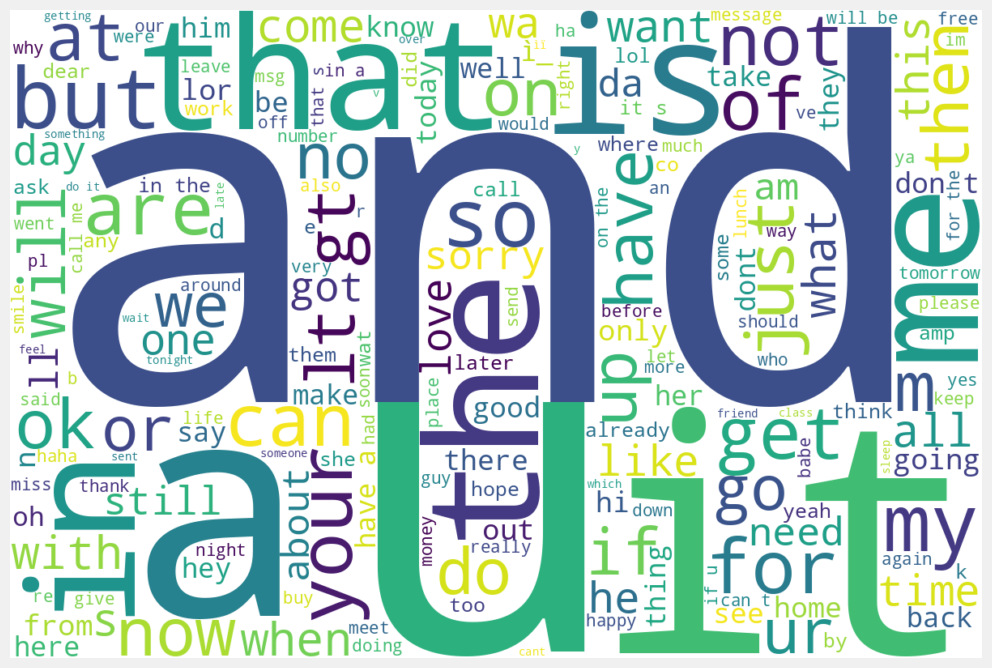

In [14]:
from wordcloud import WordCloud
text = ""

for message in train[train.Label == 'ham'].SMS:
    words = message.split()
    text = text + " ".join(words) + " "

# stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=800,stopwords=words,background_color='white').generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

# table with word counts

In [15]:
x=pd.DataFrame(word_counts)
train=pd.concat([train,x],axis=1)
train.head(5)

,Label,SMS,0,00,000,000pes,008704050406,0089,0121,01223585236,...,zac,zealand,zebra,zed,zeros,zhong,zindgi,zoe,zouk,zyada
1114,ham,no no this is kallis home ground amla home to...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3589,ham,i am in escape theatre now going to watch k...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3095,ham,we walked from my moms right on stagwood pass...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,ham,i dunno they close oredi not ìï v ma fan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3320,ham,yo im right by yo work,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Implementation

In [16]:
# Precalculating required values
alpha = 1
P_spam = train.Label.value_counts(normalize=True)['spam']
P_ham = train.Label.value_counts(normalize = True)['ham']
N_spam = len(list(chain(*messages[train.Label == 'spam'])))
N_ham = len(list(chain(*messages[train.Label == 'ham'])))
N_vocab = len(vocabulary)

In [17]:
P_word_given_spam = {word: 0 for word in vocabulary}
P_word_given_ham = {word: 0 for word in vocabulary}

Spam_messages = train[train.Label == 'spam']
Ham_messages = train[train.Label == 'ham']

for word in vocabulary:
  N_word_given_spam = Spam_messages[word].sum()
  N_word_given_ham = Ham_messages[word].sum()

  P_word_given_spam[word] = (
      (N_word_given_spam + alpha) / (N_spam + (alpha * N_vocab))
  )

  P_word_given_ham[word] = (
      (N_word_given_ham + alpha) / (N_ham + (alpha * N_vocab))
  )

In [18]:
import re
def classify(message):
  message = re.sub('\W',' ',message)
  message = message.lower()
  message = message.split()

  spam = 1
  ham = 1

  for word in message:
        if word in P_word_given_spam.keys():
            spam *= P_word_given_spam[word]
        if word in P_word_given_ham.keys():
            ham *= P_word_given_ham[word]

  P_spam_given_message = P_spam * spam
  P_ham_given_message = P_ham * ham



  if P_spam_given_message > P_ham_given_message:
      return 'spam'
  elif P_spam_given_message < P_ham_given_message:
      return 'ham'


In [19]:
if(classify("How are you?")=='spam'):
  print('Spam')
else:
  print('ham')

ham


In [22]:
test['predicted']=test.SMS.apply(classify)
#test[test.Label=='spam'].head(5)
test.head(10)

,Label,SMS,predicted
4456,ham,aight should i just plan to come up later toni...,ham
690,ham,was the farm open,ham
944,ham,i sent my scores to sophas and i had to do sec...,ham
3768,ham,was gr8 to see that message so when r u leavi...,ham
1189,ham,in that case i guess i ll see you at campus lodge,ham
4437,ham,nothing will ever be easy but don t be lookin...,ham
3587,ham,if you were are free i can give otherwise nal...,ham
1982,ham,hey i will be late i m at amk need to drin...,ham
2038,ham,hey are we going for the lo lesson or gym,ham
2078,spam,85233 free ringtone reply real,ham


In [23]:
accuracy = sum(test.Label == test.predicted)/len(test)
accuracy

0.8484304932735426